#Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)
df = pd.read_csv("loan.csv")

#Data Cleaning

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
df.shape

(39717, 111)

In [5]:
pd.set_option('display.max_info_columns', 500) #by fault it's 100 and to display summary(non-null count and dtype), max_info_col value is used, if less than actual columns, full summary is not displayed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

There seems to be many features with only Null values.


In [6]:
null_per = (df.isnull().sum()/len(df.index))*100
null_per[null_per>50]

mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_t

Dropping the features having more than 50% of null values.


In [7]:
df.drop(list(null_per[null_per>50].index),axis=1,inplace=True)  #dropping columns whose missing values is higher than 50%
df.columns.shape

(54,)

In [8]:
#dropping irrelevant columns
df.drop(['url','desc'],axis=1,inplace=True)
df.columns.shape

(52,)

In [9]:
df.select_dtypes(include=['object']).columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [10]:
for col in df.columns:
  print(col,df[col].value_counts(dropna=True).count())
drop_col = [col for col in df.columns if (df[col].value_counts(dropna=True).count()==1)]
print("\nColumns with only 1 unique value other than Null, which doesn't give much insight, so let's drop: ",drop_col)

id 39717
member_id 39717
loan_amnt 885
funded_amnt 1041
funded_amnt_inv 8205
term 2
int_rate 371
installment 15383
grade 7
sub_grade 35
emp_title 28820
emp_length 11
home_ownership 5
annual_inc 5318
verification_status 3
issue_d 55
loan_status 3
pymnt_plan 1
purpose 14
title 19615
zip_code 823
addr_state 50
dti 2868
delinq_2yrs 11
earliest_cr_line 526
inq_last_6mths 9
open_acc 40
pub_rec 5
revol_bal 21711
revol_util 1089
total_acc 82
initial_list_status 1
out_prncp 1137
out_prncp_inv 1138
total_pymnt 37850
total_pymnt_inv 37518
total_rec_prncp 7976
total_rec_int 35148
total_rec_late_fee 1356
recoveries 4040
collection_recovery_fee 2616
last_pymnt_d 101
last_pymnt_amnt 34930
last_credit_pull_d 106
collections_12_mths_ex_med 1
policy_code 1
application_type 1
acc_now_delinq 1
chargeoff_within_12_mths 1
delinq_amnt 1
pub_rec_bankruptcies 3
tax_liens 1

Columns with only 1 unique value other than Null, which doesn't give much insight, so let's drop:  ['pymnt_plan', 'initial_list_status', '

In [11]:
df.drop(drop_col,axis=1,inplace=True)

In [12]:
df.shape

(39717, 43)

In [13]:
df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000
90%,1.007009e+06,1.232878e+06,22000.000000,21000.000000,20000.000000,622.952000,1.160000e+05,22.330000,1.000000,2.000000,15.000000,0.000000,29144.400000,38.000000,0.000000,0.000000,24775.362578,24083.702000,20000.000000,5336.246000,0.000000,13.598000,0.000000,8312.710000,0.000000
95%,1.039966e+06,1.269462e+06,25000.000000,25000.000000,24736.572264,762.996000,1.420000e+05,23.840000,1.000000,3.000000,17.000000,1.000000,41656.400000,43.000000,0.000000,0.000000,30245.118530,29627.236000,24999.982000,7575.812000,14.924199,362.418000,5.152000,12183.944000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


We see outliers in quite few columns such as annual_inc, outstanding principle, etc. 

In [14]:
import numpy as np
df.describe(include=[np.object])

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
count,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39706,39717,39717,39717,39667,39646,39715
unique,2,371,7,35,28820,11,5,3,55,3,14,19615,823,50,526,1089,101,106
top,36 months,10.99%,B,B3,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,debt_consolidation,Debt Consolidation,100xx,CA,Nov-98,0%,May-16,May-16
freq,29096,956,12020,2917,134,8879,18899,16921,2260,32950,18641,2184,597,7099,370,977,1256,10308


Here, top shows the mode of the feature and freq gives frequency of the mode for that feature.

Observations: 
1. most loans are taken by employees with 10+yrs exp.
2. Most loans are fully-paid.
3. Background verification of the applicants are not completed in majority of the cases. 

In [15]:
#manipulating types of categorical features

df['term'] = df['term'].str.strip("months").astype('int')
print(df['term'].head(3))

0    36
1    60
2    36
Name: term, dtype: int64


In [16]:
df['int_rate'] = df['int_rate'].str.strip("%").astype('float')
print(df['int_rate'].head(3))

0    10.65
1    15.27
2    15.96
Name: int_rate, dtype: float64


In [17]:
df['emp_length'].value_counts(dropna=False)

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

In [18]:
df['emp_length'] = df['emp_length'].apply(lambda x : x if pd.isna(x) else x.replace("< ","").replace("+","")).str.split(" ", n = 1, expand = True)[0]
print(df['emp_length'].value_counts())

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64


RENT        0.475842
MORTGAGE    0.444621
OWN         0.076995
OTHER       0.002467
NONE        0.000076
Name: home_ownership, dtype: float64 



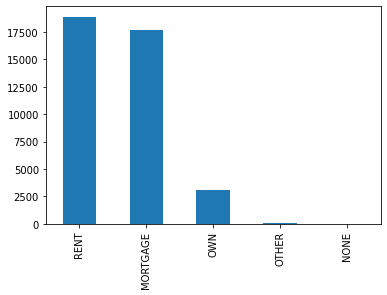

In [32]:
print(df['home_ownership'].value_counts(dropna=False,normalize=True),"\n")
df['home_ownership'].value_counts(dropna=False).plot(kind='bar')

In [20]:
df['verification_status'].value_counts(dropna=False)

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [22]:
import datetime as dt
df['issue_d'] = df['issue_d'].apply(lambda x:dt.datetime.strptime(x,'%b-%y'))
df['issue_d'].head(3)

0   2011-12-01
1   2011-12-01
2   2011-12-01
Name: issue_d, dtype: datetime64[ns]

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64 



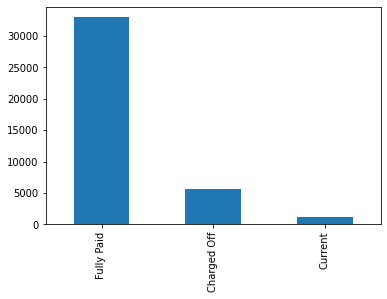

In [30]:
print(df['loan_status'].value_counts(dropna=False,normalize=True),"\n")
df['loan_status'].value_counts(dropna=False).plot(kind='bar')

Around 82.96% of loans have been fully paid. 14.17% has been defaulted. And 2.8% loans are ongoing.

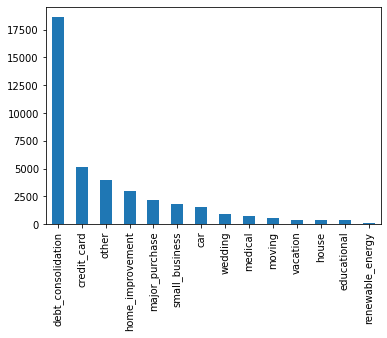

In [25]:
df['purpose'].value_counts(dropna=False).plot(kind='bar')